# IMPORT THƯ VIỆN

In [346]:
#import thư viện 
import torch
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ĐỌC DỮ LIỆU


In [347]:
df = pd.read_csv(r"C:/Users/npt31/Downloads/beophi.csv", index_col= 0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [348]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 772
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               773 non-null    int64  
 1   Glucose                   772 non-null    float64
 2   BloodPressure             773 non-null    int64  
 3   SkinThickness             773 non-null    int64  
 4   Insulin                   773 non-null    int64  
 5   BMI                       772 non-null    float64
 6   DiabetesPedigreeFunction  773 non-null    float64
 7   Age                       773 non-null    int64  
 8   Outcome                   773 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 60.4 KB


In [349]:
df.isnull().sum()


Pregnancies                 0
Glucose                     1
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [350]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,773.000000,772.000000,773.000000,773.000000,773.000000,772.000000,773.000000,773.000000,773.000000
mean,3.824062,121.813472,69.952135,20.552393,79.380336,37.513342,0.469982,33.191462,0.351876
std,3.369336,40.868603,30.392494,15.927667,114.990798,155.004046,0.331145,11.744123,0.480568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,19.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.275000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,25.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,126.000000,36.600000,0.624000,41.000000,1.000000
max,17.000000,830.000000,722.000000,99.000000,846.000000,4333.100000,2.420000,81.000000,2.000000


Ta thấy:
- Feature Glucose và BMI có Null Values  
- Ở phần max của các cột BloodPressure, Insulin và BMI xuất hiện giá trị lớn bất thường 
- Giá trị outcome đáng lẽ phải là 0 hoặc 1 nhưng xuất hiện 2

In [351]:
df = df[df["BMI"] < 4333.1]
df[df["BMI"] >= 4333.1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [352]:
df = df[df["BloodPressure"] < 722]
df[df["BloodPressure"] >= 722]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [353]:
df = df[df["Glucose"] < 830]
df[df["Glucose"] >= 830]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [354]:
df = df[df["Outcome"] < 2]
df[df["Outcome"] >= 2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Để khắc phục vấn đề giá trị khuyết thiếu ta sẽ thử thực nghiệm trên 4 phương pháp:
- Drop luôn record bị khuyết
- Fill bằng giá trị 0
- Fill bằng giá trị trung bình toàn cục
- Fill bằng "KNN Imputer"

In [355]:
df_mean = df.copy(deep=True)
df_zero = df.copy(deep=True)
df_imputed = df.copy(deep=True)
df_drop = df.copy(deep=True)

In [356]:
df_drop = df_drop.dropna()
df_drop.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [357]:
df_zero['Glucose'] = df_zero['Glucose'].fillna(0)
df_zero['BMI'] = df_zero['BMI'].fillna(0)

df_zero.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [358]:
df_mean['Glucose'] = df_mean['Glucose'].fillna(df_mean['Glucose'].mean())
df_mean['BMI'] = df_mean['BMI'].fillna(df_mean['BMI'].mean())

df_mean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [359]:
from sklearn.impute import KNNImputer
# uniform => các neighbors đều có trọng số như nhau
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# CHIA DỮ LIỆU TRAIN/TEST

In [360]:
y_drop = df_drop["Outcome"]  
x_drop = df_drop.drop(columns=["Outcome"], axis=1) 

In [361]:
y_zero = df_zero["Outcome"]  
x_zero = df_zero.drop(columns=["Outcome"], axis=1) 

In [362]:
y_mean = df_mean["Outcome"]  
x_mean = df_mean.drop(columns=["Outcome"], axis=1) 

In [363]:
y_imputed = df_imputed["Outcome"]  
x_imputed = df_imputed.drop(columns=["Outcome"], axis=1)

In [364]:
from sklearn.model_selection import train_test_split
x_train_drop, x_test_drop, y_train_drop, y_test_drop = train_test_split(x_drop, y_drop, test_size=0.2 ,random_state=221)
x_train_zero, x_test_zero, y_train_zero, y_test_zero = train_test_split(x_zero, y_zero, test_size=0.2 ,random_state=221)
x_train_mean, x_test_mean, y_train_mean, y_test_mean = train_test_split(x_mean, y_mean, test_size=0.2 ,random_state=221)
x_train_imputed, x_test_imputed, y_train_imputed, y_test_imputed = train_test_split(x_imputed, y_imputed, test_size=0.2 ,random_state=221)

# HUẤN LUYỆN VÀ ĐÁNH GIÁ MÔ HÌNH DECISION TREE

In [365]:
#Gọi thư viện
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [366]:
my_tree_drop = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, random_state= 221)
my_tree_drop.fit(x_train_drop, y_train_drop)
y_pred_drop = my_tree_drop.predict(x_test_drop)

print(classification_report(y_test_drop, y_pred_drop))


              precision    recall  f1-score   support

           0       0.73      0.88      0.80        93
           1       0.73      0.49      0.59        61

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.69       154
weighted avg       0.73      0.73      0.71       154



In [367]:
#Xây dựng Classification Tree
my_tree_zero = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, random_state= 221)
my_tree_zero.fit(x_train_zero, y_train_zero)
y_pred_zero = my_tree_zero.predict(x_test_zero)

print(classification_report(y_test_zero, y_pred_zero))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        93
           1       0.73      0.49      0.59        61

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.69       154
weighted avg       0.73      0.73      0.71       154



In [368]:
my_tree_mean = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, random_state= 221)
my_tree_mean.fit(x_train_mean, y_train_mean)
y_pred_mean = my_tree_mean.predict(x_test_mean)

print(classification_report(y_test_mean, y_pred_mean))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        93
           1       0.73      0.49      0.59        61

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.69       154
weighted avg       0.73      0.73      0.71       154



In [369]:
my_tree_imputed = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, random_state= 221)
my_tree_imputed.fit(x_train_imputed, y_train_imputed)
y_pred_imputed = my_tree_imputed.predict(x_test_imputed)

print(classification_report(y_test_imputed, y_pred_imputed))

              precision    recall  f1-score   support

         0.0       0.73      0.88      0.80        93
         1.0       0.73      0.49      0.59        61

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.69       154
weighted avg       0.73      0.73      0.71       154



# FEATURE SELECTION

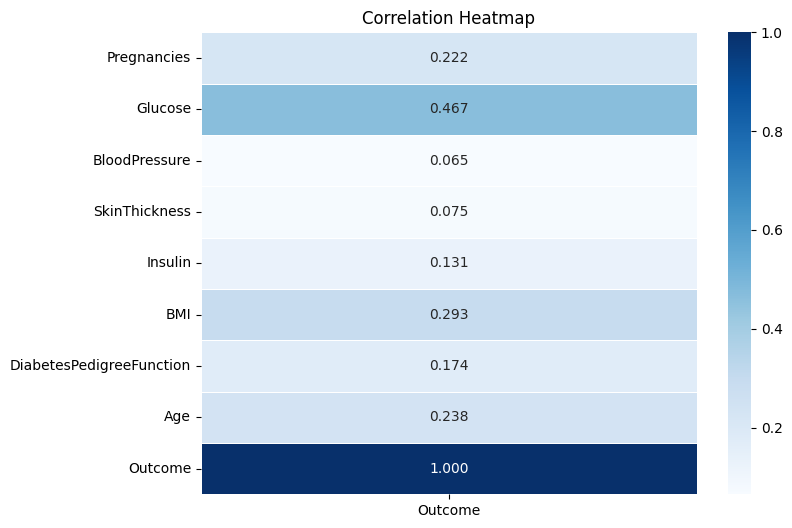

In [370]:
corr_matrix = df.corr()
corr_matrix = corr_matrix["Outcome"].to_frame()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.3f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [371]:
y_imputed = df_imputed["Outcome"]  
x_imputed = df_imputed.drop(columns=["Outcome"], axis=1)[["Pregnancies", "Glucose", "BMI", "Age"]] 

In [372]:
x_imputed.head()


,Pregnancies,Glucose,BMI,Age
0,6.0,148.0,33.6,50.0
1,1.0,85.0,26.6,31.0
2,8.0,183.0,23.3,32.0
3,1.0,89.0,28.1,21.0
4,0.0,137.0,43.1,33.0


In [373]:
x_train_imputed, x_test_imputed, y_train_imputed, y_test_imputed = train_test_split(x_imputed, y_imputed, test_size=0.2 ,random_state=221)


In [374]:
my_tree_imputed = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, random_state= 221)
my_tree_imputed.fit(x_train_imputed, y_train_imputed)
y_pred = my_tree_imputed.predict(x_test_imputed)

print(classification_report(y_test_imputed, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.76        93
         1.0       0.63      0.64      0.63        61

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.71      0.71      0.71       154



# TRỰC QUAN HÓA CONFUSION MAXTRIX

[[82 11]
 [31 30]]
[[82 11]
 [31 30]]
[[82 11]
 [31 30]]
[[82 11]
 [31 30]]


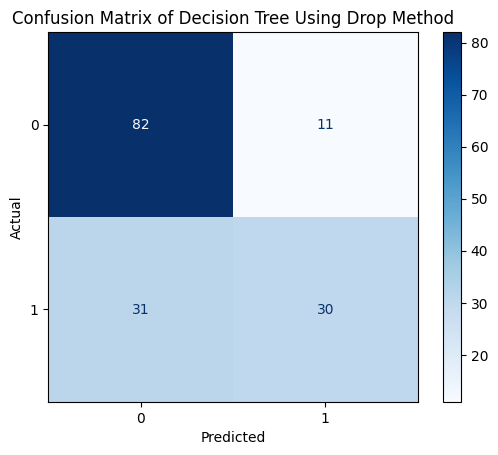

In [375]:
cm_drop = confusion_matrix(y_test_drop, y_pred_drop)
cm_zero = confusion_matrix(y_test_zero, y_pred_zero)
cm_mean = confusion_matrix(y_test_mean, y_pred_mean)
cm_imputed = confusion_matrix(y_test_imputed, y_pred_imputed)

print(cm_drop)
print(cm_zero)
print(cm_mean)
print(cm_imputed)

#Visualize
cm_display_drop = ConfusionMatrixDisplay(confusion_matrix= cm_drop)
cm_display_drop.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix of Decision Tree Using Drop Method')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# TRỰC QUAN HÓA DECISION TREE

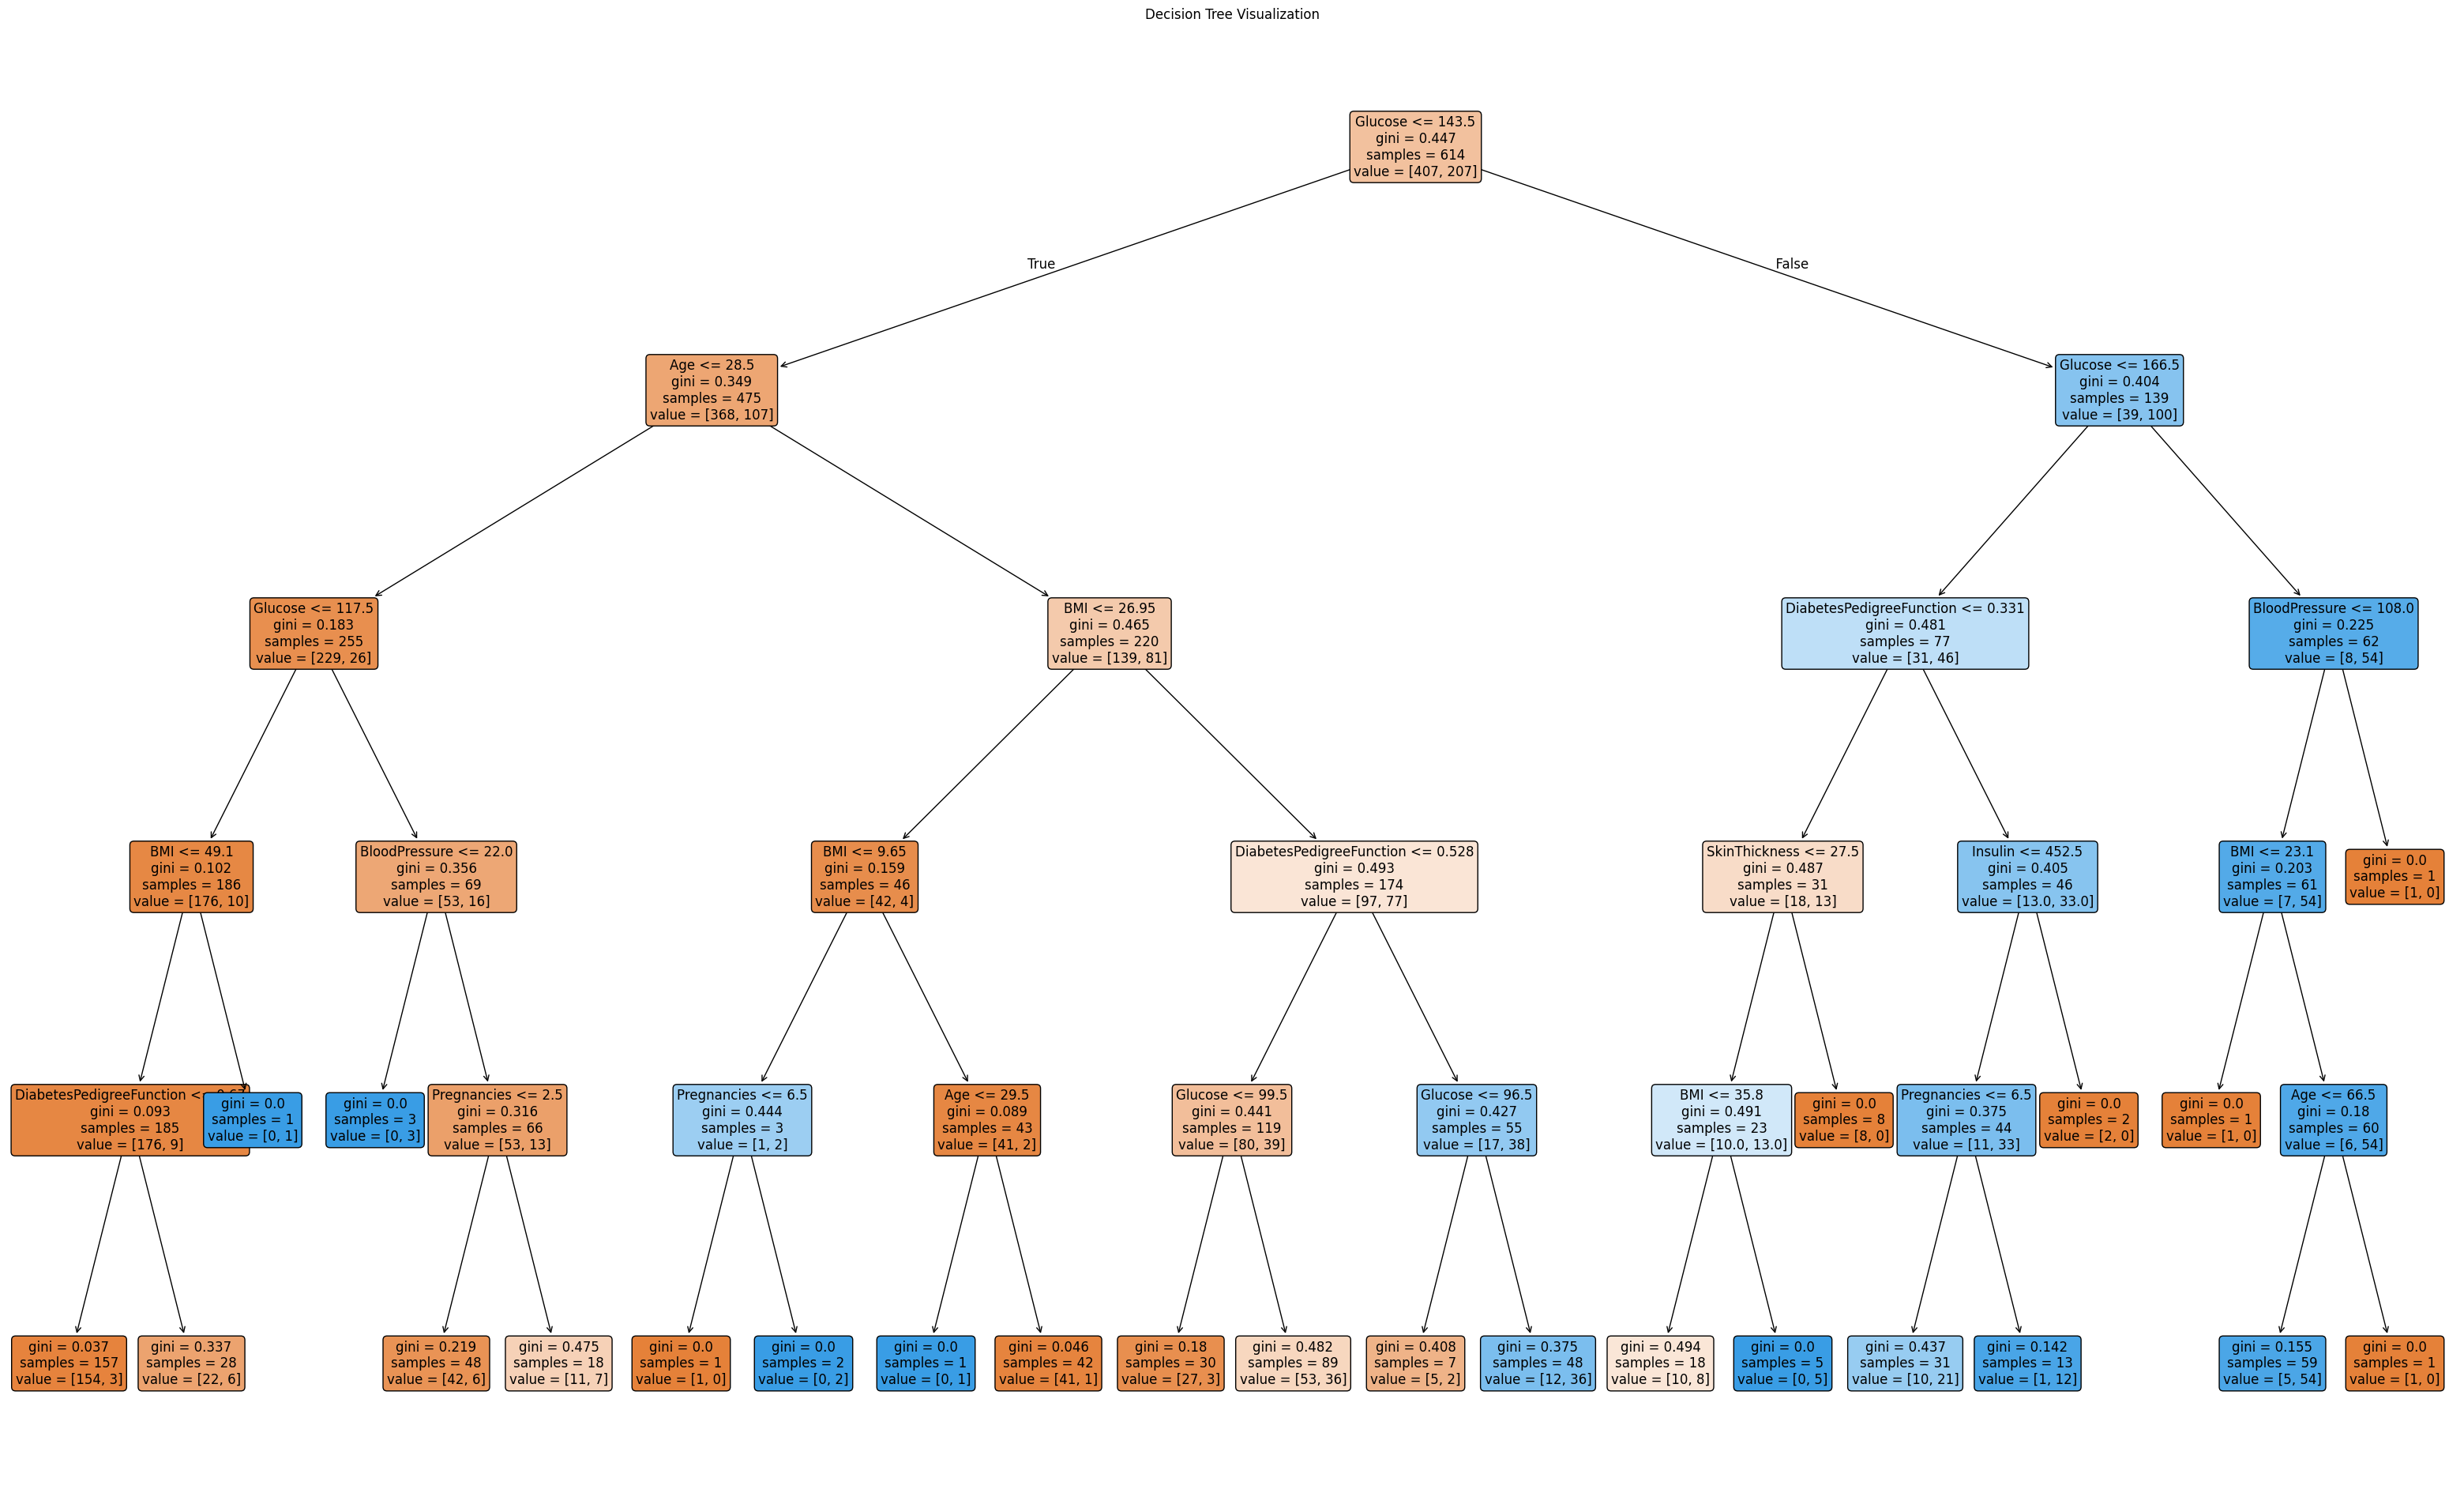

In [376]:
plt.figure(figsize=(40, 24))
tree.plot_tree(my_tree_zero, feature_names= x_zero.columns,filled= True, rounded= True, fontsize= 12)
plt.title('Decision Tree Visualization')
plt.show()